In [1]:
import yfinance as yf
from prophet import Prophet
import pandas as pd
from datetime import date
from prophet.plot import plot_plotly
from plotly import graph_objs as go

c:\Users\Jorge\anaconda3\envs\finance-bot\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('AAPL')

[*********************100%%**********************]  1 of 1 completed


In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.435270,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.746881,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.749121,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.082136,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.007429,237458000
...,...,...,...,...,...,...,...
2335,2024-04-15,175.360001,176.630005,172.500000,172.690002,172.690002,73531800
2336,2024-04-16,171.750000,173.759995,168.270004,169.380005,169.380005,73711200
2337,2024-04-17,169.610001,170.649994,168.000000,168.000000,168.000000,50901200
2338,2024-04-18,168.029999,168.639999,166.550003,167.039993,167.039993,43122900


In [5]:
df_train = data[['Date','Close']]
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})

In [6]:
df_train

,ds,y
0,2015-01-02,27.332500
1,2015-01-05,26.562500
2,2015-01-06,26.565001
3,2015-01-07,26.937500
4,2015-01-08,27.972500
...,...,...
2335,2024-04-15,172.690002
2336,2024-04-16,169.380005
2337,2024-04-17,168.000000
2338,2024-04-18,167.039993


<AxesSubplot:title={'center':"APPLE's stock"}, xlabel='Date'>

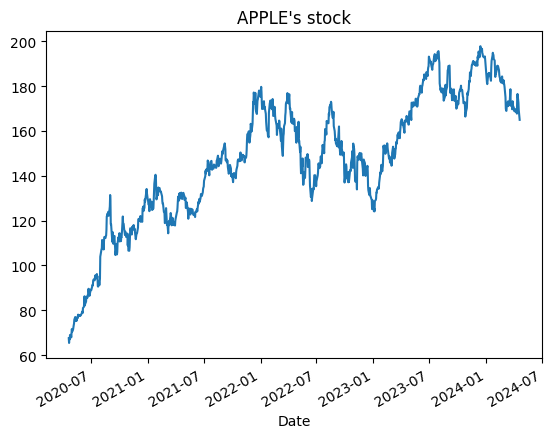

In [7]:
ticker = yf.Ticker('AAPL')
# get data of the most recent date
aapl_df = ticker.history(period='4y')
# plot the close price 
aapl_df['Close'].plot(title="APPLE's stock")


In [8]:
aapl_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-20 00:00:00-04:00,67.771129,68.680591,67.502920,67.522423,130015200,0.0,0.0
2020-04-21 00:00:00-04:00,67.363951,67.600462,64.718449,65.435295,180991600,0.0,0.0
2020-04-22 00:00:00-04:00,66.712932,67.758943,66.369145,67.320061,116862400,0.0,0.0
2020-04-23 00:00:00-04:00,67.263963,68.697654,67.020138,67.059151,124814400,0.0,0.0
2020-04-24 00:00:00-04:00,67.588265,69.004888,67.539497,68.995132,126161200,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-15 00:00:00-04:00,175.360001,176.630005,172.500000,172.690002,73531800,0.0,0.0
2024-04-16 00:00:00-04:00,171.750000,173.759995,168.270004,169.380005,73711200,0.0,0.0
2024-04-17 00:00:00-04:00,169.610001,170.649994,168.000000,168.000000,50901200,0.0,0.0


In [9]:
aapl_df.reset_index(inplace=True)

In [10]:
aapl_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-04-20 00:00:00-04:00,67.771129,68.680591,67.502920,67.522423,130015200,0.0,0.0
1,2020-04-21 00:00:00-04:00,67.363951,67.600462,64.718449,65.435295,180991600,0.0,0.0
2,2020-04-22 00:00:00-04:00,66.712932,67.758943,66.369145,67.320061,116862400,0.0,0.0
3,2020-04-23 00:00:00-04:00,67.263963,68.697654,67.020138,67.059151,124814400,0.0,0.0
4,2020-04-24 00:00:00-04:00,67.588265,69.004888,67.539497,68.995132,126161200,0.0,0.0
...,...,...,...,...,...,...,...,...
1003,2024-04-15 00:00:00-04:00,175.360001,176.630005,172.500000,172.690002,73531800,0.0,0.0
1004,2024-04-16 00:00:00-04:00,171.750000,173.759995,168.270004,169.380005,73711200,0.0,0.0
1005,2024-04-17 00:00:00-04:00,169.610001,170.649994,168.000000,168.000000,50901200,0.0,0.0
1006,2024-04-18 00:00:00-04:00,168.029999,168.639999,166.550003,167.039993,43122900,0.0,0.0


In [11]:
aapl_df['Date_only'] = aapl_df['Date'].dt.date

In [12]:
aapl_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date_only
0,2020-04-20 00:00:00-04:00,67.771129,68.680591,67.502920,67.522423,130015200,0.0,0.0,2020-04-20
1,2020-04-21 00:00:00-04:00,67.363951,67.600462,64.718449,65.435295,180991600,0.0,0.0,2020-04-21
2,2020-04-22 00:00:00-04:00,66.712932,67.758943,66.369145,67.320061,116862400,0.0,0.0,2020-04-22
3,2020-04-23 00:00:00-04:00,67.263963,68.697654,67.020138,67.059151,124814400,0.0,0.0,2020-04-23
4,2020-04-24 00:00:00-04:00,67.588265,69.004888,67.539497,68.995132,126161200,0.0,0.0,2020-04-24
...,...,...,...,...,...,...,...,...,...
1003,2024-04-15 00:00:00-04:00,175.360001,176.630005,172.500000,172.690002,73531800,0.0,0.0,2024-04-15
1004,2024-04-16 00:00:00-04:00,171.750000,173.759995,168.270004,169.380005,73711200,0.0,0.0,2024-04-16
1005,2024-04-17 00:00:00-04:00,169.610001,170.649994,168.000000,168.000000,50901200,0.0,0.0,2024-04-17
1006,2024-04-18 00:00:00-04:00,168.029999,168.639999,166.550003,167.039993,43122900,0.0,0.0,2024-04-18


In [13]:
aapl_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03,1008.000000,1008.000000
mean,147.167192,148.802599,145.618197,147.280263,8.921332e+07,0.003552,0.003968
std,29.003606,29.082915,28.938449,29.024947,4.248269e+07,0.028027,0.125988
min,66.712932,67.600462,64.718449,65.435295,2.404830e+07,0.000000,0.000000
25%,128.607410,129.962819,126.791704,128.591087,5.991840e+07,0.000000,0.000000
50%,147.645275,149.383945,146.395204,147.847374,7.875700e+07,0.000000,0.000000
75%,170.589290,172.597077,169.514800,170.852009,1.059413e+08,0.000000,0.000000
max,197.767647,199.365599,196.748941,197.857529,3.743368e+08,0.240000,4.000000


In [14]:
df=aapl_df[['Date_only','Close']]
df['Date_only'] = pd.to_datetime(df['Date_only'])

C:\Users\Jorge\AppData\Local\Temp\ipykernel_21176\487623443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_only'] = pd.to_datetime(df['Date_only'])


In [15]:
df.rename(columns={'Date_only':'ds','Close':'y'}, inplace=True)

C:\Users\Jorge\AppData\Local\Temp\ipykernel_21176\2239977441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date_only':'ds','Close':'y'}, inplace=True)


In [16]:
df.head()

,ds,y
0,2020-04-20,67.522423
1,2020-04-21,65.435295
2,2020-04-22,67.320061
3,2020-04-23,67.059151
4,2020-04-24,68.995132


In [17]:
#df=df.reset_index(drop=True)

In [18]:
#df.head()

In [19]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [20]:
#df.shape

Model implementation

In [21]:
m=Prophet()

In [22]:
m.fit(df)

22:22:32 - cmdstanpy - INFO - Chain [1] start processing
22:22:32 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1368,2025-04-15
1369,2025-04-16
1370,2025-04-17
1371,2025-04-18
1372,2025-04-19


In [24]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1368,2025-04-15,160.445335,115.498312,210.423159
1369,2025-04-16,160.218132,114.421792,209.530227
1370,2025-04-17,159.838518,112.546897,210.510693
1371,2025-04-18,159.607814,114.020666,209.759295
1372,2025-04-19,153.289230,106.925946,205.292507


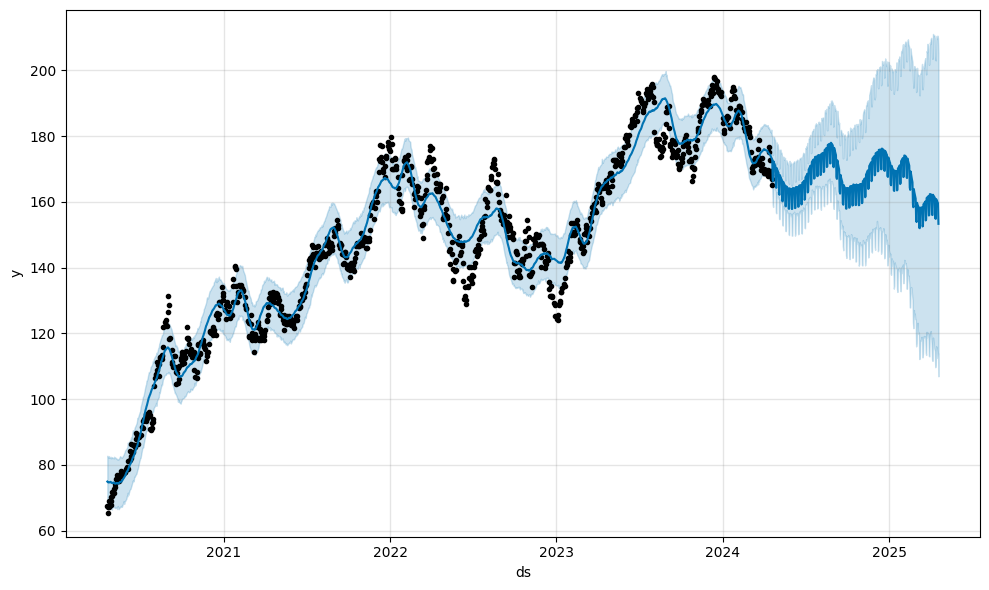

In [25]:
fig1 = m.plot(forecast)

In [26]:
fig1 = plot_plotly(m, forecast)

In [27]:
fig1

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation Heatmap')

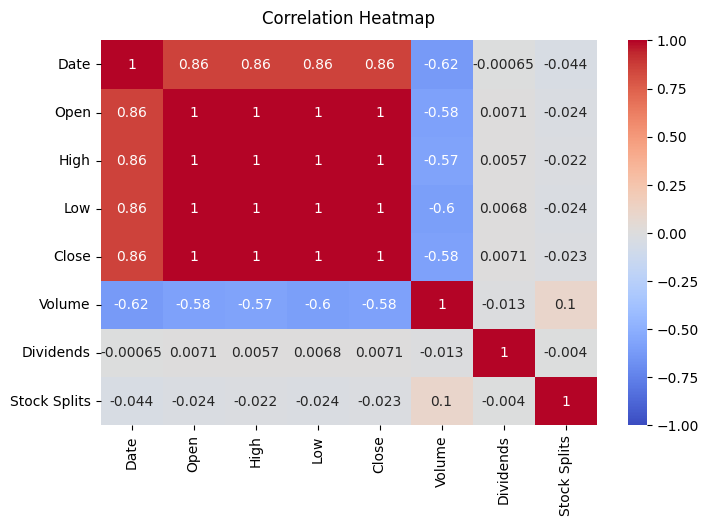

In [115]:
plt.figure(figsize=(8,5))
heatmap=sns.heatmap(aapl_df.corr(),vmin=-1, vmax=1, annot=True,cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [118]:
X=X.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'])

In [119]:
X.head()

,Date
0,2020-04-20 00:00:00-04:00
1,2020-04-21 00:00:00-04:00
2,2020-04-22 00:00:00-04:00
3,2020-04-23 00:00:00-04:00
4,2020-04-24 00:00:00-04:00


In [124]:
import pandas as pd
X['Date'] = pd.to_datetime(X['Date']).astype('int64')

In [125]:
X.head()

,Date
0,1587355200000000000
1,1587441600000000000
2,1587528000000000000
3,1587614400000000000
4,1587700800000000000


In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [127]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [128]:
model=model = LinearRegression()

In [129]:
model.fit(X_train,y_train)

LinearRegression()

In [130]:
predictions = model.predict(X_test)

In [131]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 231.62623094428704


Prediction 18/04/2024

VALUES=Open,High,Low,Dividends

In [84]:
open=168#169.58
high=168.64#170.64
low=167.55#168
#dividends=1
values=[open,high,low]

In [85]:
new_stock=model.predict([values])

c:\Users\Jorge\anaconda3\envs\finance-bot\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [86]:
new_stock[0]

168.20877749519036

169.2025124773407 is the close value for 18/04/2024    done at 11.58am France